<a href="https://colab.research.google.com/github/Sandraa123/python/blob/main/IMAGE_CLASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
from pathlib import Path
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from skimage import io, color, transform
import cv2
from PIL import Image
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os.path
from sklearn import datasets
import torch
from torchvision import models,transforms
import pickle


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
p=Path("/content/drive/MyDrive/svm_image")
dirs=p.glob("*")

In [ ]:
num_images_to_display=5

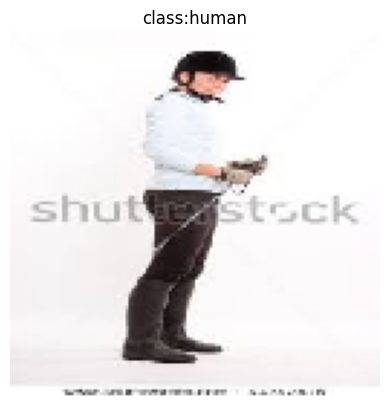

In [ ]:
for class_name in os.listdir(p):
  class_dir=os.path.join(p,class_name)
  class_image=os.listdir(class_dir)[:num_images_to_display]
  for image_filename in class_image:
    image_path=os.path.join(class_dir,image_filename)
    img=image.load_img(image_path,target_size=(128,128))
    plt.imshow(img)
    plt.title(f"class:{class_name}")
    plt.axis('off')
    plt.show


In [ ]:
# Define labels for classes
labels_dict = {'cat': 0, 'dog': 1, 'horse': 2, 'human': 3}
label_names = {v: k for k, v in labels_dict.items()}

# Initialize lists to store image data and labels
image_data = []
labels = []

In [ ]:
# Load and preprocess the images
for folder_dir in dirs:
    label = os.path.basename(str(folder_dir))  # Extract the label from the folder name

    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path, target_size=(128, 128))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict.get(label, -1))

print(len(image_data))
print(len(labels))

818
818


In [ ]:
x = np.array(image_data)
y = np.array(labels)
print(x.shape,y.shape)
unique_classes=np.unique(y)
print(unique_classes)


(818, 128, 128, 3) (818,)
[0 1 2 3]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state= 42)
imc=svm.SVC(kernel='linear', C=1)
imc.fit(x_train.reshape(x_train.shape[0],-1), y_train)

SVC(C=1, kernel='linear')

In [ ]:
acc =imc.score(x_test.reshape(x_test.shape[0], -1),y_test)
acc

0.5609756097560976

In [ ]:
new="/content/drive/MyDrive/svm_image/cat/cat.10.jpg"

In [ ]:
neww = image.load_img(new, target_size = (128, 128))

In [ ]:
ne = image.img_to_array(neww)

In [ ]:
ne = ne.reshape(1, -1)

In [ ]:
pred = imc.predict(ne)

In [ ]:
pred_label = [k for k, v in labels_dict.items() if v == pred[0]]

In [ ]:
print(pred_label[0])

cat
